<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSIT</div>
        <div style="display:inline;width:15%;">e06a</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Structures de données</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Graphes</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Analyse d'un réseau social avec  NetworkX - Correction</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
- Découverte de la bibliothèque NetworkX
- Approfondissement du concept de graphe (non-orienté et orienté)
- Mesures sur un graphe: Centre, diamètre, rayon
- Liste d'adjacence et matrice d'adjacence

<div class = "alert alert-info">
    
**Sommaire :**

- <a href=#presentation>Présentation</a>   
- <a href=#reseau_social>Instagraph: Un réseau social</a>     
- <a href=#popularite>Record de popularité: Dégré d'un sommet</a>   
- <a href=#influenceurs>Meilleurs influenceurs</a>     
- <a href=#distances>Calcul  de distance et parcours</a>  
- <a href=#distagraph>DiStaGraph></a>  

</div>

![illustration](https://github.com/ebuonocore/NSIT_06_Graphes/blob/main/reseau_soc_illustration.png?raw=true)

<div id="presentation"></div>

## Présentation

Dans l'activité précédente, nous avons utilisé **graphviz** et http://viz-js.com/ pour dessiner des graphes.  
Nous avons aussi découvert les parcours de graphe en largeur et en profondeur en débranché.  
Nous allons maintenant découvrir la très riche bibliothèque **NetworkX**.  
<p style="font-size: small; ">Sources: <a href="https://networkx.github.io/documentation/stable/reference/functions.html#paths">networkx.github.io</a> (Functions)</p>

Vous exécuterez les codes suivants dans le notebook, mais ils peuvent être aussi copiés dans votre IDE (Thonny, Spyder...) après avoir importé le module NetworkX.   
![importer_networkx](https://github.com/ebuonocore/NSIT_06_Graphes/blob/main/importer_networkx.png?raw=true)

Nous utiliserons, dans un premier temps, ce module à travers la classe **Graph** qui le compose.  
La librairie étant écrite en anglais, il faut connaitre les traductions suivantes:  

<table style="width:500px;">
    <tr>
        <td style="width:250px;background-color:#CCD;text-align:right">
            <b>Sommet/Noeud<br>  
            Arête/arc<br>
            Graphe<br>
            Voisins<br>
        </td>
        <td style="width:250px;background-color:#EEF;text-align:left">
            Node<br>  
            Edge<br>
            Graph<br>
            Neighbors<br>
        </td>
    </tr>
</table>
Nous allons princpalement utiliser les méthodes suivantes:  
<table style="width:500px;">
    <tr>
        <td style="width:250px;background-color:#CCD;text-align:right">
            <b>G = nx.Graph()<br>  
            G.add_node("Nom")<br>
            G.add_edge("Noeud_1", "Noeud_2")<br>
            nx.draw(G, with_labels=True)<br>
        </td>
        <td style="width:250px;background-color:#EEF;text-align:left">
            Instanciation d'un objet de type Graph<br>  
            Ajout d'un sommet "Nom" au graphe G<br>
            Ajout d'une arête/arc entre les sommets <br>
            Représentation graphique de G<br>
        </td>
    </tr>
</table>



<div id="reseau_social"></div>

## Instagraph: Un réseau social
Nous allons créer un premier exemple de graphe représentant les liens entre différents individus d'un réseau social en pleine expansion: 
![Instagraph](https://github.com/ebuonocore/NSIT_06_Graphes/blob/main/logo_instagraph.png?raw=true)

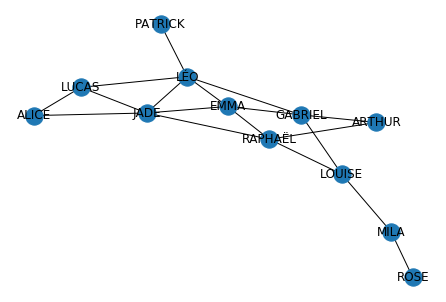

In [1]:
import networkx as nx
import matplotlib.pyplot as plt # pour les représentations graphiques

Instagraph = nx.Graph()

# Ajout des noeuds nommés
Instagraph.add_node("EMMA")
Instagraph.add_node("JADE")
Instagraph.add_node("LOUISE")
Instagraph.add_node("ALICE")
Instagraph.add_node("GABRIEL")
Instagraph.add_node("LÉO")
Instagraph.add_node("RAPHAËL")
Instagraph.add_node("ARTHUR")
Instagraph.add_node("PATRICK")
Instagraph.add_node("MILA")
Instagraph.add_node("ROSE")
Instagraph.add_node("LUCAS")


# Ajout des arêtes
Instagraph.add_edge("EMMA", "JADE")
Instagraph.add_edge("EMMA", "LÉO")
Instagraph.add_edge("MILA", "LOUISE")
Instagraph.add_edge("ROSE", "MILA")
Instagraph.add_edge("PATRICK", "LÉO")
Instagraph.add_edge("RAPHAËL", "LOUISE")
Instagraph.add_edge("RAPHAËL", "EMMA")
Instagraph.add_edge("RAPHAËL", "ARTHUR")
Instagraph.add_edge("RAPHAËL", "JADE")
Instagraph.add_edge("GABRIEL", "EMMA")
Instagraph.add_edge("GABRIEL", "LOUISE")
Instagraph.add_edge("JADE", "LÉO")
Instagraph.add_edge("GABRIEL", "LÉO")
Instagraph.add_edge("GABRIEL", "ARTHUR")
Instagraph.add_edge("ALICE", "JADE")
Instagraph.add_edge("LUCAS", "ALICE")
Instagraph.add_edge("LUCAS", "LÉO")
Instagraph.add_edge("LUCAS", "JADE")
Instagraph.add_edge("LUCAS", "LÉO")
    

# Représenation graphique
nx.draw(Instagraph, with_labels=True)

Dans le programme ci-dessus, rajoutez LUCAS qui est lié à ALICE, JADE et LEO.

Quelques opérations bien utiles:
<table style="width:500;">
    <tr>
        <td style="width:250px;background-color:#CCD;text-align:right">
            <b>G.nodes<br> 
            G.number_of_nodes()<br>
            G.edges<br>
            G.number_of_edges()<br>
            G.neighbors(s)<br>
        </td>
        <td style="width:250px;background-color:#EEF;text-align:left">
            Liste les sommets du graphe G<br>  
            Nombre de noeuds du graphe G<br>
            Liste les arcs/arêtes du graphe G<br>
            Nombre d'arcs/arêtes du graphe G<br>
            Liste les voisins du sommet s du graphe G<br>
        </td>
    </tr>
</table>

In [4]:
# Affiche tous les sommets de G
Instagraph.nodes

NodeView(('EMMA', 'JADE', 'LOUISE', 'ALICE', 'GABRIEL', 'LÉO', 'RAPHAËL', 'ARTHUR', 'PATRICK', 'MILA', 'ROSE', 'LUCAS'))

In [5]:
# Affiche la liste des arêtes de G
Instagraph.edges

EdgeView([('EMMA', 'JADE'), ('EMMA', 'LÉO'), ('EMMA', 'RAPHAËL'), ('EMMA', 'GABRIEL'), ('JADE', 'RAPHAËL'), ('JADE', 'LÉO'), ('JADE', 'ALICE'), ('JADE', 'LUCAS'), ('LOUISE', 'MILA'), ('LOUISE', 'RAPHAËL'), ('LOUISE', 'GABRIEL'), ('ALICE', 'LUCAS'), ('GABRIEL', 'LÉO'), ('GABRIEL', 'ARTHUR'), ('LÉO', 'PATRICK'), ('LÉO', 'LUCAS'), ('RAPHAËL', 'ARTHUR'), ('MILA', 'ROSE')])

In [6]:
# Ainsi, on peut récupérer le nombre d'arêtes connectées à ce sommet: Son nombre d'amis
len(Instagraph.edges('EMMA'))

4

In [7]:
# Affiche les arêtes depuis le sommet 'EMMA'
Instagraph.edges('EMMA')

EdgeDataView([('EMMA', 'JADE'), ('EMMA', 'LÉO'), ('EMMA', 'RAPHAËL'), ('EMMA', 'GABRIEL')])

In [8]:
Instagraph.neighbors('EMMA')

In [9]:
# Oups! Cette dernière instruction renvoie sur un itérateur de dictionnaire.
# Pour afficher tous les voisins, nous ferons comme ceci:
for v in Instagraph.neighbors('EMMA'):
    print(v)

JADE
LÉO
RAPHAËL
GABRIEL


Vous voila armés pour répondre aux questions suivantes:

<div id="popularite"></div>

## Record de popularité: Dégré d'un sommet
Qui est le plus populaire du graphe G (Celui qui a le plus d'amis)

In [10]:
# Les scores seront mémorisés dans la liste 'scores'
scores = []
# On parcourt tous les sommets
for s in Instagraph.nodes:
    # 'nb_amis' correspond au nombre d'arêtes liées à ce sommet s
    nb_amis = len(Instagraph.edges(s))
    # Pour chaque sommet s, on ajoute à 'scores' le p-uplet constitué du nom du sommet et du nombre de voisins
    scores.append((s,nb_amis))
# On affiche le résultat
scores

[('EMMA', 4),
 ('JADE', 5),
 ('LOUISE', 3),
 ('ALICE', 2),
 ('GABRIEL', 4),
 ('LÉO', 5),
 ('RAPHAËL', 4),
 ('ARTHUR', 2),
 ('PATRICK', 1),
 ('MILA', 2),
 ('ROSE', 1),
 ('LUCAS', 3)]

Comme souvent NetworkX propose déjà des outils pour répondre à ces besoins:  
Il était aussi possible de faire appel à la méthode <code>degree()</code>.

In [11]:
Instagraph.degree('LOUISE')

3

Il ne reste plus qu'a trier cette liste en fonction du nombre décroissant d'amis et à afficher le premier.  
Plusieurs solutions s'offrent à nous: Soit parcourir la liste, soit utiliser l'instruction <code>sorted</code> avec la clé <code>key=itemgetter()</code>*  
\* Pensez à importer le module <code>operator</code>

<p style="font-size: small; ">Coup de pouce: <a href="https://docs.python.org/3/howto/sorting.html#operator-module-functions">docs.python.org</a> (howto/sorting rubrique Operator Module Function)</p>

In [12]:
from operator import itemgetter
scores_tries = sorted(scores, key=itemgetter(1), reverse=True)
scores_tries[0][0]

'JADE'

<div id="influenceurs"></div>

## Meilleurs influenceurs

Nous allons maintenant chercher qui pourrait être le meilleur influenceur de ce réseau.  
Pour cela nous avons besoin des notions de **diamètre**, de **rayon** et de **centre** de graphe.

Reprenons l'exemple d'Instagraph pour l'illustrer:

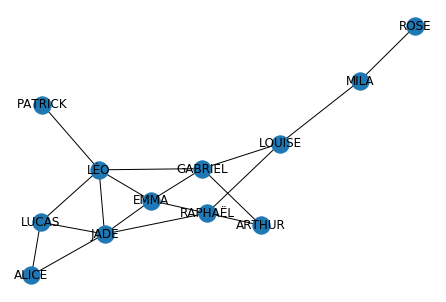

In [15]:
# Représenation graphique
nx.draw(Instagraph, with_labels=True)

JADE se situe à une arête d'EMMA, mais elle est distante de 5 arêtes de ROSE qui est la personne la plus éloignée de JADE.  
On dit que JADE a une **excentricité** de 5.  
Quelle est l'excentricité d'EMMA et de PATRICK?

Excentricité d'EMMA :  4  
Excentricité de PATRICK : 5

Il existe plusieurs individus que se situent à 3 arêtes maximum de tous les autres.
Qui sont ils?

Réponse: LOUISE, GABRIEL et RAPHAÊL

Ils constituent le **centre** de notre graphe puisqu'ils ont l'excentricité la moins élevée de tous les individus.  
Cette excentricité étant de 3. On dit que ce graphe a un **rayon** de 3.  
Si au contraire, on cherche les individus les plus éloignés (ROSE et ALICE), la distance qui les sépare représente le diamètre du graphe.

Diamètre du graphe: 5

On peut confirmer ces résultats grâce aux outils de NetworkX.  
Note: ci-dessous <code>nx</code> désigne l'alias de la bibliothèque <code>networkx</code>

<table style="width:500px;">
    <tr>
        <td style="width:250px;background-color:#CCD;text-align:right">
            <b>nx.diameter(G)<br>
            nx.radius(Instagraph)<br>
            nx.center(Instagraph)<br>
        </td>
        <td style="width:250px;background-color:#EEF;text-align:left">
            Diamètre du graphe G<br>  
            Rayon du graphe G<br>
            Centre du graphe G<br>
        </td>
    </tr>
</table>

In [16]:
print("Diamètre=",nx.diameter(Instagraph))
print("Rayon=",nx.radius(Instagraph))
print("Centre=",nx.center(Instagraph))

Diamètre= 5
Rayon= 3
Centre= ['LOUISE', 'GABRIEL', 'RAPHAËL']


<div id="distances"></div>

## Calcul  de distance et parcours
Toutes ces caractéristiques du graphe reposent sur la  mesure de distances et la recherche de chemin.  
<table style="width:500px;">
    <tr>
        <td style="width:250px;background-color:#CCD;text-align:right">
            <b>nx.shortest_path</br>
            nx.shortest_path_length</br>
        </td>
        <td style="width:250px;background-color:#EEF;text-align:left">
            Chemin le plus court entre deux sommets<br>
            Mesure la distance entre deux sommets<br> 
        </td>
    </tr>
</table>
Par défaut cette algorithme utilise la méthode de Dijkstra.  
<p style="font-size: small; ">Sources: <a href="https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html">networkx.github.io</a> (Shortest Paths)</p>

In [17]:
nx.shortest_path(Instagraph, 'PATRICK', 'ROSE')

['PATRICK', 'LÉO', 'GABRIEL', 'LOUISE', 'MILA', 'ROSE']

In [18]:
nx.shortest_path_length(Instagraph, 'PATRICK', 'ROSE')

5

<div id="distagraph"></div>

## DiStaGraph>
Notre réseau social préféré opère une modification importante et devient maintenant:

![DiStaGrpah>](https://github.com/ebuonocore/NSIT_06_Graphes/blob/main/distagraph_logo.png?raw=true)
Les relations peuvent être asymétriques: Vous ne suivez pas forcément les personnes qui vous suivent.  
Le graphe correspond cette fois à un graphe orienté: <code>DiStaGraph = nx.DiGraph()</code>

Pour simplifier, les participants sont représentés par des lettres: de 'A' à 'H'. 

Pour construire le graphe, on vous donne une **liste des prédécesseurs**.  

<table style="width:350px;">
    <tr>
        <td style="width:100px;background-color:#EEF;text-align:center">
            <b>Sommet<br>
            A<br>
            B<br>
            E<br>
            F<br>
        </td>
        <td style="width:250px;background-color:#EFEFFF;text-align:left">
            <b>Prédecesseurs (L'arc vient de...)</b><br>
            B,C<br> 
            E<br>
            C, D, F, G, H<br>
            E, H, B<br>
        </td>
    </tr>
</table>
A partir de cette liste, reconstruisez la matrice d'adjacence:

Matrice d'adjacence:

          A   B   C   D   E   F   G   H    <- Destination de l'arc
        
       A  0   0   0   0   0   0   0   0
        
       B  1   0   0   0   0   1   0   0
        
       C  1   0   1   0   0   0   0   0
        
       D  0   0   1   0   0   0   0   0
       
       E  0   1   0   0   0   1   0   0   
        
       F  0   0   1   0   0   0   0   0   
        
       G  0   0   1   0   0   0   0   0
        
       H  0   0   1   0   0   1   0   0
       
       ^
       Origine de l'arc

Implémentez ce graphe avec NetworkX:

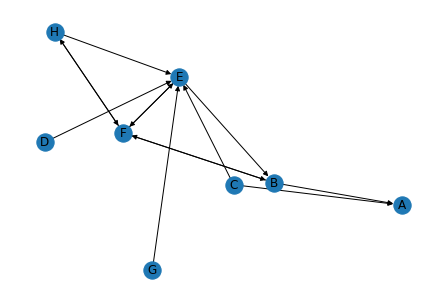

In [20]:
import networkx as nx
import matplotlib.pyplot as plt # pour les représentations graphiques

DiStaGraph = nx.DiGraph()

# Ajout des noeuds nommés
DiStaGraph.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])


# Ajout des arêtes
DiStaGraph.add_edge('B','A')
DiStaGraph.add_edge('E','B')
DiStaGraph.add_edge('C','E')
DiStaGraph.add_edge('D','E')
DiStaGraph.add_edge('F','E')
DiStaGraph.add_edge('E','F')
DiStaGraph.add_edge('G','E')
DiStaGraph.add_edge('H','E')
DiStaGraph.add_edge('F','H')
DiStaGraph.add_edge('F','B')
DiStaGraph.add_edge('C','A')
DiStaGraph.add_edge('H','F')
DiStaGraph.add_edge('B','F')
    

# Représenation graphique
nx.draw(DiStaGraph, with_labels=True)

Notez que l'arc entre F et E est bidirectionnel.
Existe-t-il un chemin entre 'H' et 'A'?  
Précisez le code qui permet d'en trouver la longueur (s'il existe)

In [23]:
try:
    print(nx.shortest_path_length(DiStaGraph, 'H', 'A'))
except:
    print("Il n'y a pas de chemin entre H and A.")

3


Existe-t-il un chemin entre 'A' et 'H'?  
Précisez le code qui permet d'en trouver la longueur (s'il existe)

In [24]:
try:
    print(nx.shortest_path_length(DiStaGraph, 'A', 'H'))
except:
    print("Il n'y a pas de chemin entre A and H.")

Il n'y a pas de chemin entre A and H.


Affichez les degrés des différents sommets. (Nombre de personnes qui les suivent)

In [25]:
DiStaGraph.degree()

DiDegreeView({'A': 2, 'B': 4, 'C': 2, 'D': 1, 'E': 7, 'F': 6, 'G': 1, 'H': 3})

Affichez la liste des sommets classés dans l'odre décroissant de leurs degrés.

In [26]:
from operator import itemgetter
scores_tries = sorted(DiStaGraph.degree(), key=itemgetter(1), reverse=True)
scores_tries

[('E', 7),
 ('F', 6),
 ('B', 4),
 ('H', 3),
 ('A', 2),
 ('C', 2),
 ('D', 1),
 ('G', 1)]

la fonction **draw** peut prendre un dictionnaire en paramètre.  
Il devient possible d'imposer l'emplacement des sommets dans la représentation graphique.

{'E': [7, 1], 'F': [6, -1], 'B': [4, 1], 'H': [3, -1], 'A': [2, 1], 'C': [2, -1], 'D': [1, 1], 'G': [1, -1]}


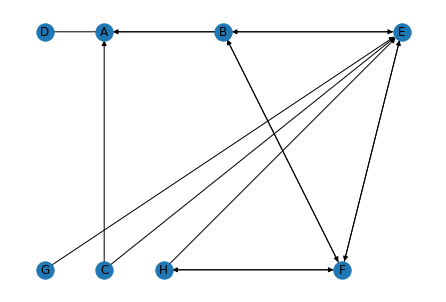

In [32]:
pos ={}
for id_sommet in range(len(scores_tries)):
    pos[scores_tries[id_sommet][0]]=[scores_tries[id_sommet][1], (-1)**id_sommet]
print(pos)
nx.draw(DiStaGraph, pos, with_labels=True)

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. Octobre 2020 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)